--- Перші 10 рядків --- [cite: 10]
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
5         0       3    male   NaN      0      0   8.4583        Q
6         0       1    male  54.0      0      0  51.8625        S
7         0       3    male   2.0      3      1  21.0750        S
8         1       3  female  27.0      0      2  11.1333        S
9         1       2  female  14.0      1      0  30.0708        C

--- Інформація про пропущені значення та статистика --- [cite: 11]
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
         Survived      Pclass 

<Figure size 1000x800 with 0 Axes>

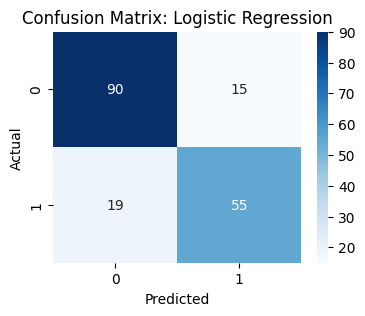


Model: Decision Tree
Accuracy: 0.7933, Precision: 0.7681, Recall: 0.7162, F1: 0.7413


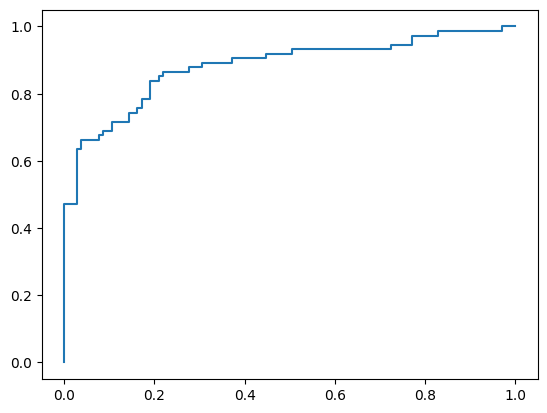

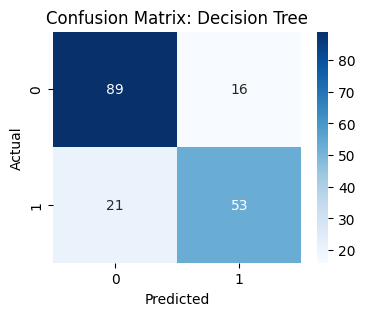


Model: Random Forest
Accuracy: 0.8156, Precision: 0.7971, Recall: 0.7432, F1: 0.7692


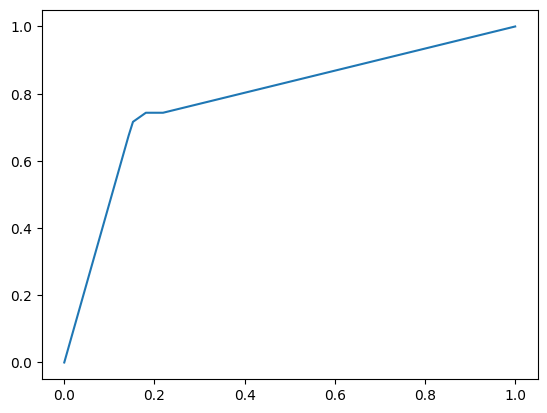

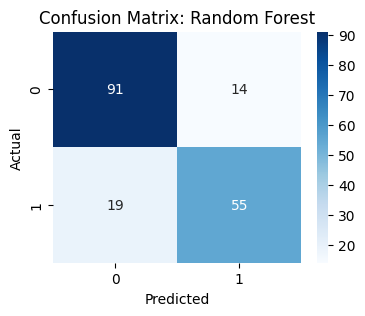

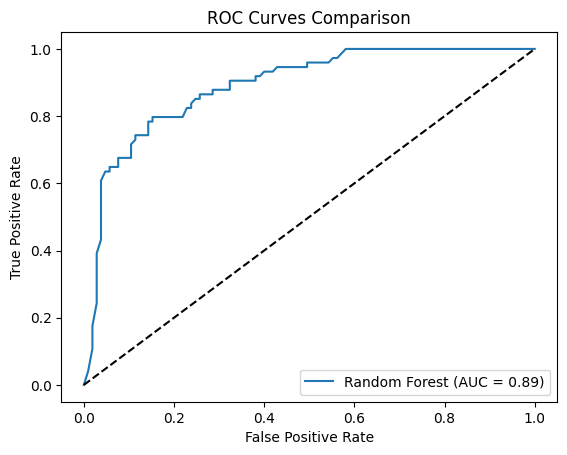


--- Оптимізація (Cross-Validation) --- [cite: 35]
Logistic Regression CV Accuracy: 0.7890
Decision Tree CV Accuracy: 0.7789

--- Оптимізація Random Forest (GridSearch) --- [cite: 36]
Найкращі параметри: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Оптимізований Random Forest Accuracy: 0.8492

--- Підсумкова таблиця результатів ---
                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.810056   0.785714  0.743243  0.763889
Decision Tree        0.793296   0.768116  0.716216  0.741259
Random Forest        0.815642   0.797101  0.743243  0.769231


C:\Users\ymrfe\AppData\Local\Temp\ipykernel_10336\1072206057.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


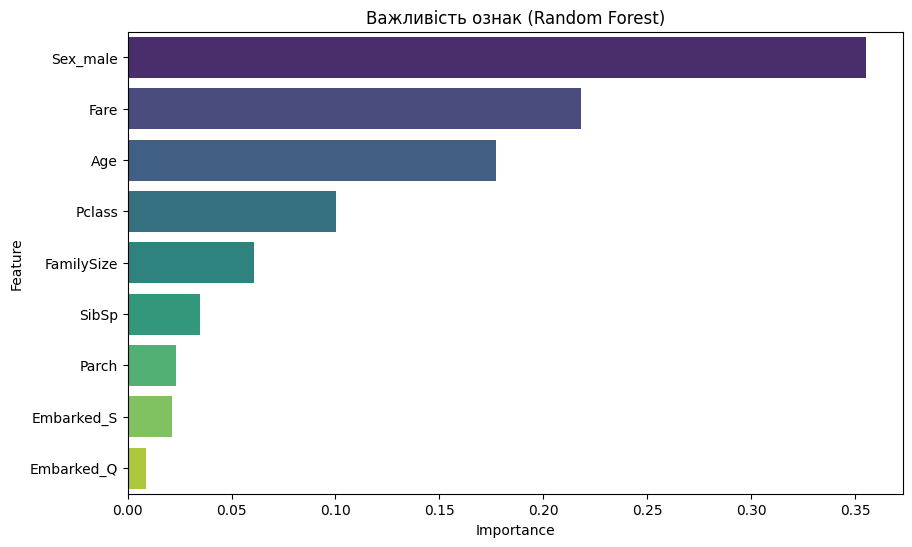


Найважливіші фактори виживання: Sex_male


In [3]:
# ==========================================
# 1. Підготовка середовища та завантаження даних [cite: 6, 7, 8]
# ==========================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

df = sns.load_dataset('titanic')


df.rename(columns={
    'age': 'Age', 'embarked': 'Embarked', 'sex': 'Sex', 
    'sibsp': 'SibSp', 'parch': 'Parch', 'survived': 'Survived', 
    'pclass': 'Pclass', 'fare': 'Fare'
}, inplace=True)


df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# ==========================================
# 2. Ознайомлення з даними [cite: 9]
# ==========================================
print("--- Перші 10 рядків --- [cite: 10]")
print(df.head(10))

print("\n--- Інформація про пропущені значення та статистика --- [cite: 11]")
print(df.isnull().sum())
print(df.describe())

# ==========================================
# 3. Попередня обробка даних [cite: 12]
# ==========================================


df['Age'] = df['Age'].fillna(df['Age'].mean())


mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)


df['FamilySize'] = df['SibSp'] + df['Parch']


df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

print("\n--- Дані після обробки ---")
print(df_encoded.head())

# ==========================================
# 4. Поділ даних [cite: 20]
# ==========================================
X = df_encoded.drop('Survived', axis=1) 
y = df_encoded['Survived']              


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# 5. Побудова та оцінка моделей [cite: 22, 23, 31]
# ==========================================


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

plt.figure(figsize=(10, 8)) 

for name, model in models.items():
    model.fit(X_train, y_train)
    
   
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    
   
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = [acc, prec, rec, f1]
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
    
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
   
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    
    plt.figure(100) 
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.figure(100)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

# ==========================================
# 6. Оптимізація моделей [cite: 34]
# ==========================================

print("\n--- Оптимізація (Cross-Validation) --- [cite: 35]")
cv_scores_lr = cross_val_score(models["Logistic Regression"], X, y, cv=5)
print(f"Logistic Regression CV Accuracy: {cv_scores_lr.mean():.4f}")

cv_scores_dt = cross_val_score(models["Decision Tree"], X, y, cv=5)
print(f"Decision Tree CV Accuracy: {cv_scores_dt.mean():.4f}")

print("\n--- Оптимізація Random Forest (GridSearch) --- [cite: 36]")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Найкращі параметри: {rf_grid.best_params_}")
best_rf = rf_grid.best_estimator_
y_pred_opt = best_rf.predict(X_test)
print(f"Оптимізований Random Forest Accuracy: {accuracy_score(y_test, y_pred_opt):.4f}")

# ==========================================
# 7. Порівняння моделей [cite: 37, 38]
# ==========================================
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-score']).T
print("\n--- Підсумкова таблиця результатів ---")
print(results_df)

# ==========================================
# 8. Творче завдання: Важливість ознак [cite: 39, 40]
# ==========================================
importances = best_rf.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Важливість ознак (Random Forest)')
plt.show()

print("\nНайважливіші фактори виживання:", feature_imp_df.iloc[0]['Feature'])